In [1]:
from collections import Counter
from datetime import datetime
import statistics as sts
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
POSTS_PATH = "../2.NerSaLang/Post_Analysis.json"

## Estadísticas de las publicaciones

In [4]:
n_likes = []
n_comments = []
n_interactions = []
n_hashtags = []
n_mentions = []

sponsor_p = []
distribucion_img = [0]*11

locations = []
dates = []
hashtags = []
mentions = []
profiles  = []

with open(POSTS_PATH, 'r') as input_file:

    for line in input_file:
        post = json.loads(line)
        n_comments.append(post['n_comments'])
        n_likes.append(post['likes'])
        n_interactions.append(post['n_comments'] + post['likes'])
        profiles.append(post['profile'])

        sponsor_p.append(post['sponsor_users'])
        locations.append(post['location'])

        post_date = datetime.strptime(post['date'].split("T")[0], "%Y-%m-%d")
        dates.append(post_date)

        for hash in post['caption_hashtags']:
            hashtags.append(hash)
        n_hashtags.append(len(post['caption_hashtags']))

        for mention in post['caption_mentions']:
            mentions.append(mention)
        n_mentions.append(len(post['caption_mentions']))
n_post = len(n_comments)


In [35]:
print(f"Number of posts: {len(n_comments)}")
print(f"Number of comments: {sum(n_comments)}")
print(f"Number of likes: {sum(n_likes)}")
print(f"Number of interactions: {sum(n_interactions)}")

print(f"Number of locations: {len(set(locations))}")
print(f"Number of hashtags: {len(set(hashtags))}")
print(f"Number of publisher accounts: {len(set(profiles))}")
print(f"Number of mentioned accounts: {len(set(mentions))}")

print(f"Number of total mentions: {len(mentions)}")

Number of posts: 5865
Number of comments: 22775
Number of likes: 397944
Number of interactions: 420719
Number of locations: 2
Number of hashtags: 5681
Number of publisher accounts: 955
Number of mentioned accounts: 784
Number of total mentions: 1617


In [36]:
print(f"Maximum number of likes on a post: {max(n_likes)}")
print(f"Maximum number of comments on a post: {max(n_comments)}")
print(f"Maximum number of interactions on a post: {max(n_interactions)}")
print(f"Maximum number of hashtaghs on a post: {max(n_hashtags)}")
print(f"Maximum number of mentions on a post: {max(n_mentions)}")

Maximum number of likes on a post: 7675
Maximum number of comments on a post: 638
Maximum number of interactions on a post: 8095
Maximum number of hashtaghs on a post: 38
Maximum number of mentions on a post: 24


In [37]:

print(f"Average number of likes on a post: {sts.mean(n_likes)} +- {sts.stdev(n_likes)}")
print(f"Average number of comments on a post: {sts.mean(n_comments)} +- {sts.stdev(n_comments)}")
print(f"Average number of interactions on a post: {sts.mean(n_interactions)} \
        +- {sts.stdev(n_interactions)}")
print(f"Average number of hashtaghs on a post: {sts.mean(n_hashtags)} +- {sts.stdev(n_hashtags)}")
print(f"Average number of mentions on a post: {sts.mean(n_mentions)} +- {sts.stdev(n_mentions)}")


Average number of likes on a post: 67.85063938618926 +- 244.8094970165279
Average number of comments on a post: 3.8832054560954816 +- 21.595511839407116
Average number of interactions on a post: 71.73384484228474         +- 258.3906574235189
Average number of hashtaghs on a post: 21.827109974424552 +- 11.349545861139296
Average number of mentions on a post: 0.27570332480818416 +- 1.3420212736286854


In [38]:
print(f"Median of likes on a post: {sts.median(n_likes)}")
print(f"Median of comments on a post: {sts.median(n_comments)}")
print(f"Median of interactions on a post: {sts.median(n_interactions)}")
print(f"Median of hashtaghs on a post: {sts.median(n_hashtags)}")
print(f"Median of mentions on a post: {sts.median(n_mentions)}")

Median of likes on a post: 12
Median of comments on a post: 0
Median of interactions on a post: 13
Median of hashtaghs on a post: 29
Median of mentions on a post: 0


## A nivel de fechas

In [39]:
popular_dates = Counter(dates).most_common(10)

for date, count in popular_dates:
    print(f'On {date}: {count}')

On 2022-12-28 00:00:00: 234
On 2022-12-27 00:00:00: 204
On 2022-10-09 00:00:00: 102
On 2023-03-25 00:00:00: 89
On 2022-06-28 00:00:00: 64
On 2023-02-02 00:00:00: 62
On 2022-12-29 00:00:00: 59
On 2022-06-29 00:00:00: 52
On 2023-03-08 00:00:00: 47
On 2023-01-26 00:00:00: 45


In [17]:
date

datetime.datetime(2022, 6, 28, 0, 0)

In [18]:
total_dates = Counter(dates)

In [22]:
for date, count in total_dates.most_common(1000):
    print(f'{date}: {count}')

2022-12-28 00:00:00: 234
2022-12-27 00:00:00: 204
2022-10-09 00:00:00: 102
2023-03-25 00:00:00: 89
2022-06-28 00:00:00: 64
2023-02-02 00:00:00: 62
2022-12-29 00:00:00: 59
2022-06-29 00:00:00: 52
2023-03-08 00:00:00: 47
2023-01-26 00:00:00: 45
2023-05-29 00:00:00: 44
2023-02-08 00:00:00: 44
2023-04-20 00:00:00: 43
2022-10-07 00:00:00: 42
2022-11-28 00:00:00: 40
2022-10-04 00:00:00: 40
2023-05-10 00:00:00: 39
2023-03-24 00:00:00: 39
2023-03-27 00:00:00: 38
2023-03-21 00:00:00: 38
2023-02-17 00:00:00: 38
2023-01-05 00:00:00: 37
2023-03-26 00:00:00: 36
2023-02-13 00:00:00: 36
2022-10-10 00:00:00: 36
2022-10-06 00:00:00: 36
2023-02-10 00:00:00: 34
2023-01-16 00:00:00: 34
2022-10-08 00:00:00: 34
2023-03-22 00:00:00: 33
2023-01-21 00:00:00: 33
2022-11-29 00:00:00: 33
2022-10-03 00:00:00: 33
2023-04-30 00:00:00: 32
2022-12-31 00:00:00: 32
2022-10-02 00:00:00: 32
2022-12-14 00:00:00: 31
2023-04-04 00:00:00: 31
2023-03-23 00:00:00: 31
2023-03-09 00:00:00: 31
2023-03-06 00:00:00: 31
2023-02-15 00

In [40]:
print(f'Earliest date: {min(dates)}')
print(f'Latest date: {max(dates)}')

Earliest date: 2020-06-16 00:00:00
Latest date: 2023-05-30 00:00:00


In [16]:
popular_dates = Counter(dates)
datesC = []
dates_counts = []
for date, count in popular_dates.items():
    datesC.append(date)
    dates_counts.append(count)

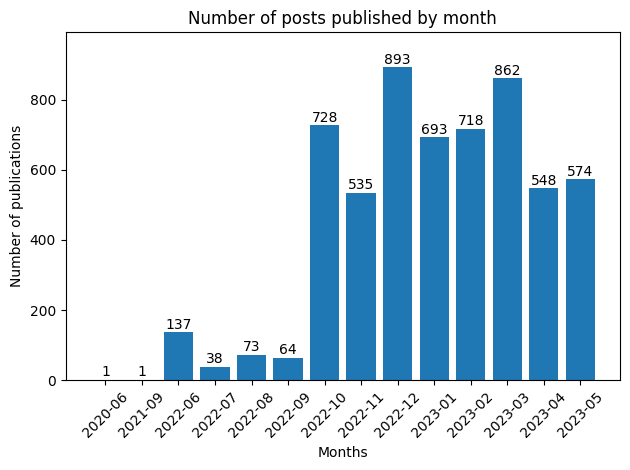

In [76]:
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

# Extract months from datetime objects
months = [date.strftime("%Y-%m") for date in dates]

# Create a Counter object for the months
popular_months = Counter(months)

# Extract months and their counts
monthsC = []
months_counts = []
for month, count in popular_months.items():
    monthsC.append(month)
    months_counts.append(count)

data = list(zip(monthsC, months_counts))

# Sort the list by date in ascending order
data.sort(key=lambda x: x[0])

# Unpack the sorted list into separate date and count lists
monthsC, months_counts = zip(*data)

# Create a bar chart
plt.bar(monthsC, months_counts)

# Customize the chart
plt.xlabel('Months')
plt.ylabel('Number of publications')
plt.title('Number of posts published by month')
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability

# Add publication counts at the top of the bars
for i, count in enumerate(months_counts):
    x = monthsC[i]
    y = count + 1  # Adjust the vertical position
    plt.text(x, y, str(count), ha='center', va='bottom', fontsize=10, rotation=0)

plt.ylim(0, max(months_counts) + 100)  # Adjust y-axis limits based on the maximum count

# Display the chart
plt.tight_layout()
plt.show()


In [71]:
# Example data
dates = ["2020-06", "2021-03", "2019-12", "2020-06", "2021-03"]
counts = [5, 10, 2, 8, 3]

# Combine the two lists into a list of tuples (date, count)
data = list(zip(dates, counts))

# Sort the list by date in ascending order
data.sort(key=lambda x: x[0])

# Unpack the sorted list into separate date and count lists
sorted_dates, sorted_counts = zip(*data)

# Print the sorted lists
print(sorted_dates)
print(sorted_counts)


('2019-12', '2020-06', '2020-06', '2021-03', '2021-03')
(2, 5, 8, 10, 3)


# A nivel de hashtag

In [ ]:
popular_hashtag = Counter(hashtags).most_common(10)
for hashtag, count in popular_hashtag:
    print(f'On {hashtag}: {count}')

On noalaborto: 6852
On provida: 3344
On sialavida: 2020
On soyprovida: 2009
On providamundial: 1836
On follow: 1809
On noalabortosialavida: 1647
On salvemoslas2vidas: 1592
On aborto: 1238
On niunbebemenos: 1211


In [ ]:
target = ["noalaborto", "salvemoslasdosvidas", "sialavida", "mareaverde", "quesealey", "provida"]

for t in target:
    print(f"On {t}: {hashtags.count(t)}")

On noalaborto: 6852
On salvemoslasdosvidas: 959
On sialavida: 2020
On mareaverde: 27
On quesealey: 1
On provida: 3344


In [ ]:
print(len(hashtags))

128016


# A nivel de autor


In [24]:
print(f"Average number of post by publisher: {n_post/len(set(profiles))}")
publishers = []
publication_counts = []
popular_publisher = Counter(profiles).most_common(40)
for publisher, count in popular_publisher:
    #print(f'On {publisher}: {count}')
    publishers.append(publisher)
    publication_counts.append(count)

Average number of post by publisher: 6.141361256544503


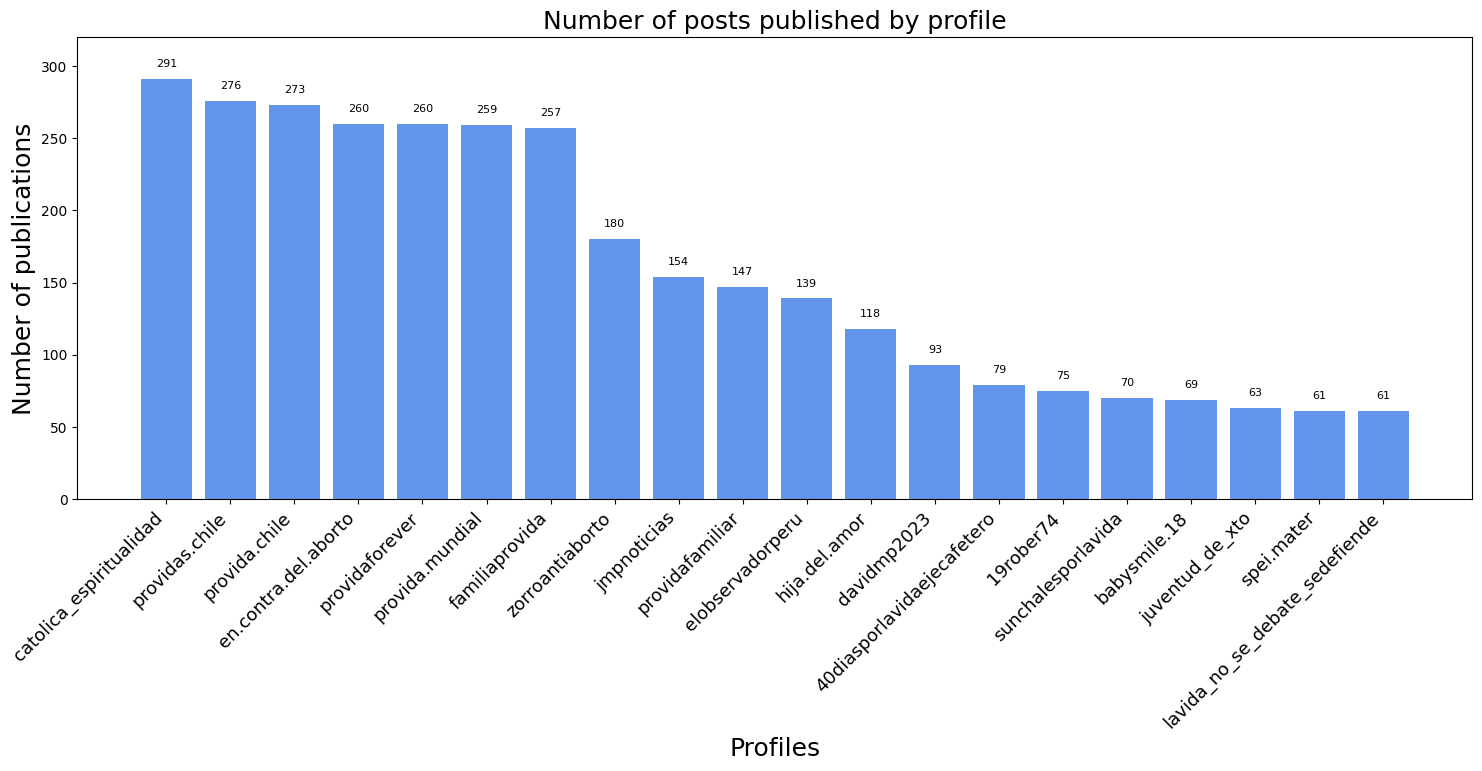

In [77]:
plt.figure(figsize=(18, 6)) # Create a bar chart
plt.bar(publishers[:20], publication_counts[:20],color = "cornflowerblue")

# Customize the chart (optional)
plt.xlabel('Profiles',fontsize=18)
plt.ylabel('Number of publications',fontsize=18)
plt.title('Number of posts published by profile',fontsize=18)
plt.xticks(rotation=45, fontsize=13, ha='right', va='top')  # Rotate x-axis labels for better readability
for i, count in enumerate(publication_counts[:20]):
    
    x = publishers[i] 
    y = count +7  # Adjust the vertical position
    plt.text(x, y, str(count), ha='center', va='bottom', fontsize=8, rotation=0)
plt.ylim(0, 320)
# Display the chart

#plt.tight_layout()  # Ensures labels fit within the figure area
plt.show()

In [10]:
popular_publisher = Counter(profiles).most_common(15)
for publisher, count in popular_publisher:
    print(f'On {publisher}: {count}')
    

On catolica_espiritualidad: 291
On providas.chile: 276
On provida.chile: 273
On en.contra.del.aborto: 260
On providaforever: 260
On provida.mundial: 259
On familiaprovida: 257
On zorroantiaborto: 180
On jmpnoticias: 154
On providafamiliar: 147
On elobservadorperu: 139
On hija.del.amor: 118
On davidmp2023: 93
On 40diasporlavidaejecafetero: 79
On 19rober74: 75


In [ ]:
posts = []
with open(POSTS_PATH, 'r') as input_file:

    for line in input_file:
        posts.append(json.loads(line))

In [ ]:
sorted_data = sorted(posts, key=lambda x: x['n_comments'] + x['likes'], reverse=True)
n = 5  # Number of texts to retrieve
highest_texts = [(d['n_comments'] + d['likes'], d["date"], d['caption'], d["_id"], d["url"]) for d in sorted_data[:n]]

for i in highest_texts:
    print(i)

(8095, '2023-02-05T01:00:44.000Z', 'Me encantó este videito que te comparto ! Ojalá que ayude a tomar conciencia de lo que se está promoviendo desgraciadamente en varios lugares del mundo… Aquí te dejo este testimonio en primera persona. Cuidemos y protejamos la vida de todos ! Comparte este mensaje! Bendiciones! @padreadolfo\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n#vida #vidahumana #noalaborto #noalabortosialavida #down #downsyndrome #sindromededown', '64763111967e4199e3264c16', 'https://www.instagram.com/p/CoQvFYJNz-4')
(5576, '2023-05-26T13:08:45.000Z', 'De coherencia no se van a morir…\nTampoco de inteligencia.\n\nPero en fin, los leo\n\nCompártelo (y etiquétame para irte a comentar por tu lado también 😎) \n\n.\n.\n.\n#LobbyPolitico #PorDetras\n#Lobby\n#NoAlAborto\n#ProVida\n#Trans\n\n#ConLosNiñosNo\n#Balenciaga \n#Trans\n#Transgenero\n#Biologia \n#LeyTrans \n#IreneMontero\n#Igualdad\n#EnLasCompetenciasFemeninasNo \n#LGTBQRSTUWXYZ \n#LGTBQ \n#Mujeres \n#Mujer\n#Amigues \n#Feministas \nEl #P

# Gráficos estadísticos


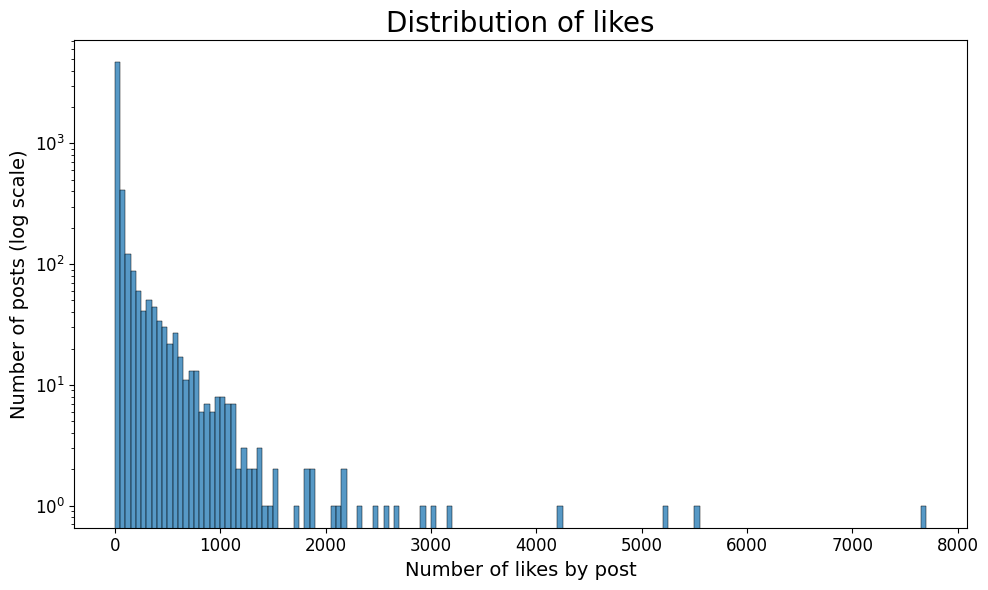

In [62]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the main histogram using Seaborn
sns.histplot(n_likes, bins=range(0, max(n_likes) + 50, 50), kde=False, ax=ax, log=True)
# Customize the main histogram
ax.set_xlabel('Number of likes by post', fontsize=14)
ax.set_ylabel('Number of posts (log scale)', fontsize=14)
ax.set_title('Distribution of likes', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the chart
plt.tight_layout()
plt.show()


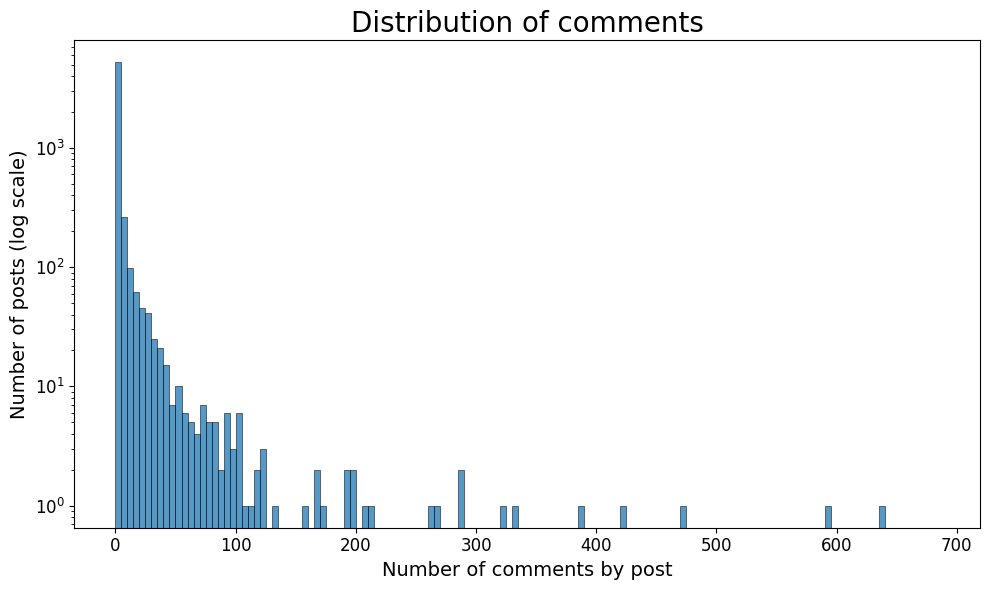

In [63]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the main histogram using Seaborn
sns.histplot(n_comments, bins=range(0, max(n_comments) + 50, 5), kde=False, ax=ax, log=True)
# Customize the main histogram
ax.set_xlabel('Number of comments by post', fontsize=14)
ax.set_ylabel('Number of posts (log scale)', fontsize=14)
ax.set_title('Distribution of comments', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the chart
plt.tight_layout()
plt.show()


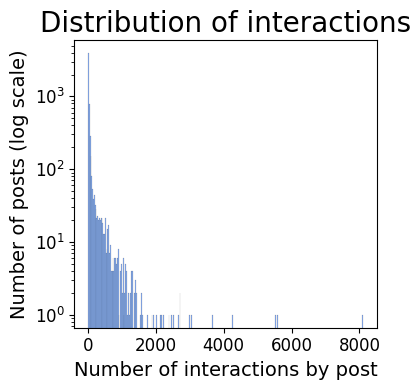

In [90]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Create the main histogram using Seaborn
sns.histplot(n_interactions, bins=range(0, max(n_interactions) + 25, 25), kde=False, ax=ax, log=True,color = "cornflowerblue")
# Customize the main histogram
ax.set_xlabel('Number of interactions by post', fontsize=14)
ax.set_ylabel('Number of posts (log scale)', fontsize=14)
ax.set_title('Distribution of interactions', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the chart
plt.tight_layout()
plt.show()


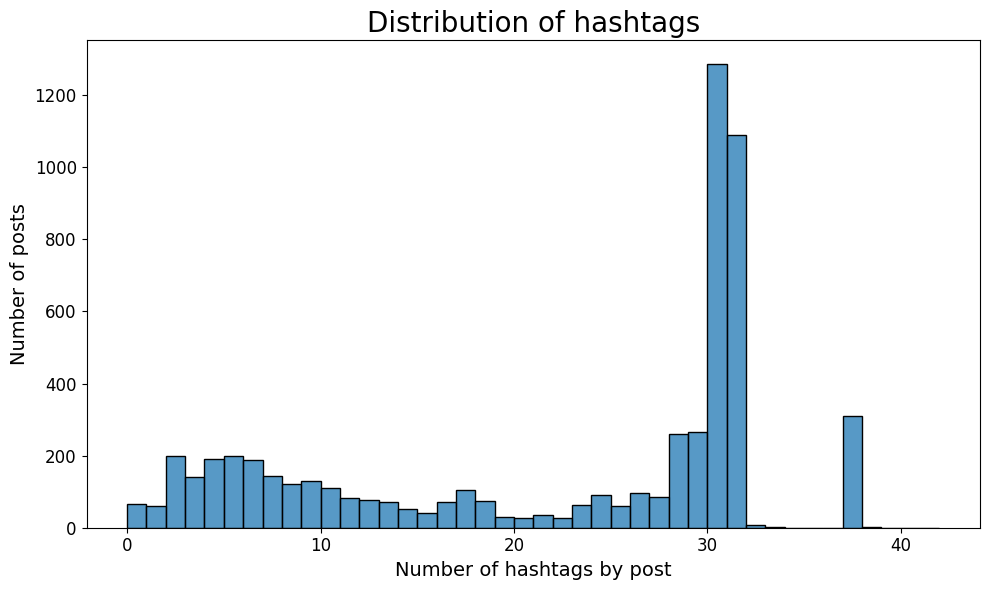

In [65]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the main histogram using Seaborn
sns.histplot(n_hashtags, bins=range(0, max(n_hashtags) + 5, 1), kde=False, ax=ax)
# Customize the main histogram
ax.set_xlabel('Number of hashtags by post', fontsize=14)
ax.set_ylabel('Number of posts', fontsize=14)
ax.set_title('Distribution of hashtags', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the chart
plt.tight_layout()
plt.show()


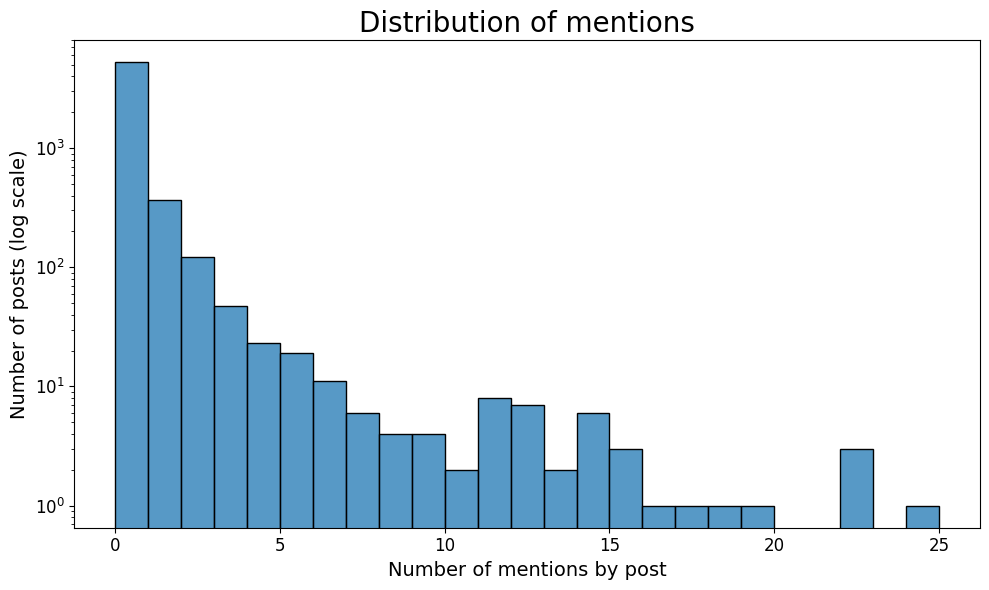

In [66]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the main histogram using Seaborn
sns.histplot(n_mentions, bins=range(0, max(n_mentions) + 2, 1), kde=False, ax=ax, log=True)
# Customize the main histogram
ax.set_xlabel('Number of mentions by post', fontsize=14)
ax.set_ylabel('Number of posts (log scale)', fontsize=14)
ax.set_title('Distribution of mentions', fontsize=20)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the chart
plt.tight_layout()
plt.show()
